In [8]:
#%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np
provider = IBMQ.load_account()

    
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

#contants
n = 1
theta = 1

#create quantum circuit
qc = QuantumCircuit(4, 4)

#create Quantum operators

F1_dag = Operator([
    [1, 0, 0, 0],
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0, 1/np.sqrt(2)*np.exp(-2*np.pi*1j), -1/np.sqrt(2)*np.exp(-2*np.pi*1j), 0],
    [0, 0, 0, -np.exp(-2*np.pi*1j)]])

F0_dag = Operator([
    [1, 0, 0, 0],
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0],
    [0, 0, 0, -1]])
B1_dag = Operator([
    [np.cos(theta/2), 0, 0, 1j*np.sin(theta/2)],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [ 1j*np.sin(theta/2),0,0,np.cos(theta/2)]])

fswap = Operator([
        [1,0,0,0],
        [0,0,1,0],
        [0,1,0,0],
        [0,0,0,-1]
])



#Create quantum Gates
qc.unitary(B1_dag, [0, 1], label='B1_dag')
qc.unitary(F1_dag, [0, 1], label='F1_dag')
qc.unitary(F0_dag, [2, 3], label='F0_dag')
qc.unitary(fswap,[1,2],label ='fSWAP')
qc.unitary(F0_dag, [0, 1], label='F0_dag')
qc.unitary(F0_dag, [2, 3], label='F0_dag')
qc.unitary(fswap,[1,2],label ='fSWAP')

#Set measurement step
for i in range(0,4):
    qc.measure(i,i)

#display circuit
qc.draw()


/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-04 22:41:43,581: Credentials are already in use. The existing account in the session will be replaced.


┌─────────┐┌─────────┐          ┌─────────┐          ┌─┐      
q_0: ┤0        ├┤0        ├──────────┤0        ├──────────┤M├──────
     │  B1_dag ││  F1_dag │┌────────┐│  F0_dag │┌────────┐└╥┘┌─┐   
q_1: ┤1        ├┤1        ├┤0       ├┤1        ├┤0       ├─╫─┤M├───
     ├─────────┤└─────────┘│  fSWAP │├─────────┤│  fSWAP │ ║ └╥┘┌─┐
q_2: ┤0        ├───────────┤1       ├┤0        ├┤1       ├─╫──╫─┤M├
     │  F0_dag │           └────────┘│  F0_dag │└──┬─┬───┘ ║  ║ └╥┘
q_3: ┤1        ├─────────────────────┤1        ├───┤M├─────╫──╫──╫─
     └─────────┘                     └─────────┘   └╥┘     ║  ║  ║ 
c: 4/═══════════════════════════════════════════════╩══════╩══╩══╩═
                                                    3      0  1  2

$ \newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$ \newcommand{\bra}[1]{\left\langle{#1}\right|}$
$$ \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

when it comes to implementation:  
first try to run circuit on simulator 
second try to run on real hardware

long term goal is reproduce figures 5 (Ground state of a spin chain)and 6 (time evolution of operator $\sigma_z$) 

short term goal is initialize the state to  $ \ket{0000}  $ and $\ket{ 1100} $

Job Status: job has successfully run


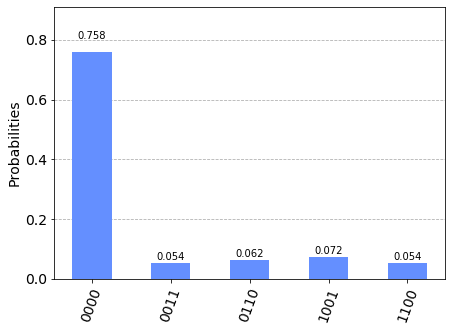

In [9]:
#Start up and initialize circuit
#Measurement

    
    #Choose provider and backend
#provider = IBMQ.get_provider()
#backend = Aer.get_backend('statevector_simulator')
backend = provider.get_backend('ibmq_qasm_simulator')
#backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmqx2')
#backend = provider.get_backend('ibmq_16_melbourne')

shots = 1024
max_credits = 10 #Max number of credits to spend on execution
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result = job_exp.result()
counts = result.get_counts(qc)
plot_histogram(counts)